In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
import os
import math
import numpy as np
import scipy
import random
from PIL import Image
import cv2
from matplotlib import pyplot as plt
from tensorflow.contrib.learn.python.learn.datasets.mnist import DataSet
import datetime

Using TensorFlow backend.


In [2]:
import glob

path = "/tmp/tiny-imagenet-200/"
train_dirs = glob.glob(path + "train/*")
val_dirs   = glob.glob(path + "val/*")
test_dirs  = glob.glob(path + "test/*")

# There are only 200 used labels in both training and validation
used_labels =  [ d[-9:] for d in train_dirs ]
len(used_labels)

# Hot-Encode Labels
from sklearn.preprocessing import LabelBinarizer
bin_encoder = LabelBinarizer()
bin_encoder.fit_transform(used_labels).size

# Helper Functions
def get_image(img_path):
#     img = img_to_array(load_img(img_path))
    img = cv2.imread(img_path, cv2.CV_LOAD_IMAGE_COLOR)
    return img / 255.0

def get_images(paths):
    n = len(paths)
    X = np.empty(shape=(n, 64,64,3))
    for i,p in enumerate(paths):
        img = cv2.imread(p, cv2.CV_LOAD_IMAGE_COLOR) / 255.0
        X[i, ...] = img
    return X

def shuffle(*args):
    fusion = list(zip(*args))
    np.random.shuffle(fusion)
    return zip(*fusion)

### Getting Validation Data

In [3]:
val_labels, val_images = [], []

for line in open(path + 'val/val_annotations.txt'):
    [fn, classname, _ , _, _, _ ] = line.strip().split('\t')

    img = get_image(path +'val/images/' + fn )     # validation does not need shuffling
    val_labels.append(classname)                   # 10K images probably fit in RAM
    val_images.append(img)

val_images = np.array(val_images)
# hot-encode labels from string to number
val_labels = bin_encoder.transform(val_labels)

print(len(val_images), len(val_labels)) 
print(val_images[0].shape, val_labels.shape)   # sanity check

10000 10000
(64, 64, 3) (10000, 200)


### Model Evaluation

In [4]:
import h5py as h5py
from keras.models import load_model

In [5]:
model = load_model('models/model_Wed_22_54.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
activation_22 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 32)        4640      
__________

In [6]:
print(model.metrics_names)
model.evaluate(np.array(val_images), val_labels)

['loss', 'acc']
 9888/10000 [============================>.] - ETA: 0s

[7.6350520240783695, 0.14419999999999999]

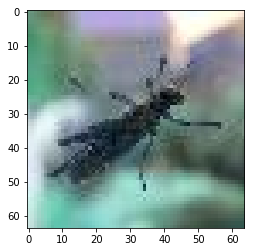

In [20]:
plt.imshow(val_images[12])
plt.show()